In [9]:
# BIbliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("=== VÍCIO E VARIÂNCIA DE ESTIMADORES ===\n")

=== VÍCIO E VARIÂNCIA DE ESTIMADORES ===



In [2]:
# 1. CONFIGURAÇÃO INICIAL
plt.style.use('seaborn-v0_8')
np.random.seed(42)  # Para reproducibilidade

# Gerando os dados (equivalente ao código R)
x = np.linspace(np.pi/4, 2*np.pi - np.pi/4, 30)
fx = np.sin(x)  # Função verdadeira

print(f"Número de pontos: {len(x)}")
print(f"Intervalo de x: {x.min():.3f} a {x.max():.3f}")

Número de pontos: 30
Intervalo de x: 0.785 a 5.498



1. PRIMEIRA DEMONSTRAÇÃO - UM CONJUNTO DE DADOS


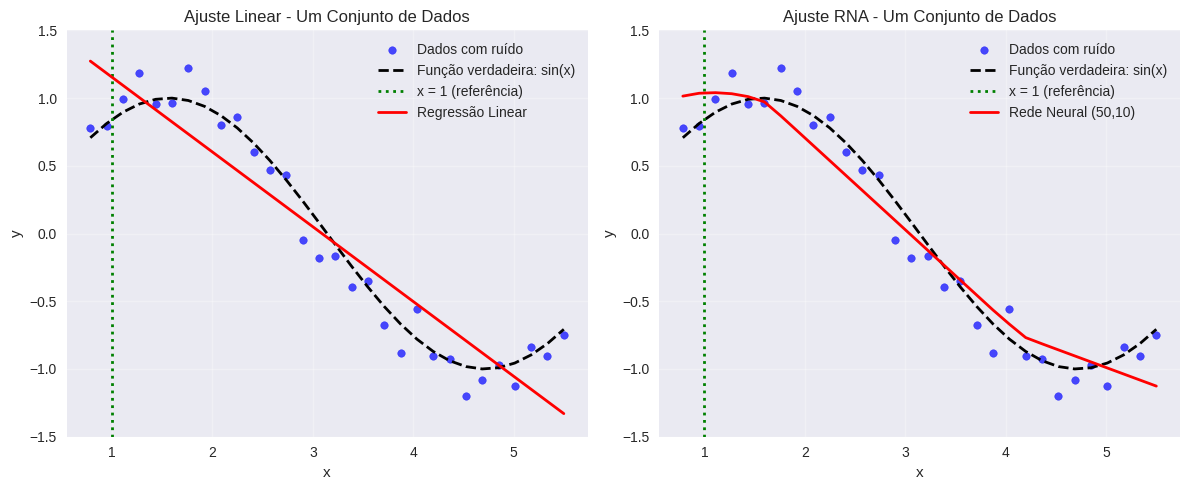

In [3]:
# 2. PRIMEIRA DEMONSTRAÇÃO: UM CONJUNTO DE DADOS
print("\n1. PRIMEIRA DEMONSTRAÇÃO - UM CONJUNTO DE DADOS")

# Gerar dados com ruído
y = np.sin(x) + np.random.normal(0, 0.15, len(x))

# Ajuste do modelo linear
modelo_linear = LinearRegression()
X_reshaped = x.reshape(-1, 1)  # sklearn precisa de matriz 2D
modelo_linear.fit(X_reshaped, y)
y_pred_linear = modelo_linear.predict(X_reshaped)

# Ajuste da rede neural
modelo_rna = MLPRegressor(hidden_layer_sizes=(50, 10), max_iter=1000, random_state=42)
modelo_rna.fit(X_reshaped, y)
y_pred_rna = modelo_rna.predict(X_reshaped)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', s=30, alpha=0.7, label='Dados com ruído')
plt.plot(x, fx, 'k--', linewidth=2, label='Função verdadeira: sin(x)')
plt.axvline(x=1, color='green', linestyle=':', linewidth=2, label='x = 1 (referência)')
plt.plot(x, y_pred_linear, 'red', linewidth=2, label='Regressão Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Linear - Um Conjunto de Dados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)

plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', s=30, alpha=0.7, label='Dados com ruído')
plt.plot(x, fx, 'k--', linewidth=2, label='Função verdadeira: sin(x)')
plt.axvline(x=1, color='green', linestyle=':', linewidth=2, label='x = 1 (referência)')
plt.plot(x, y_pred_rna, 'red', linewidth=2, label='Rede Neural (50,10)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste RNA - Um Conjunto de Dados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()


2. DEMONSTRAÇÃO DO VÍCIO E VARIÂNCIA - MODELO LINEAR


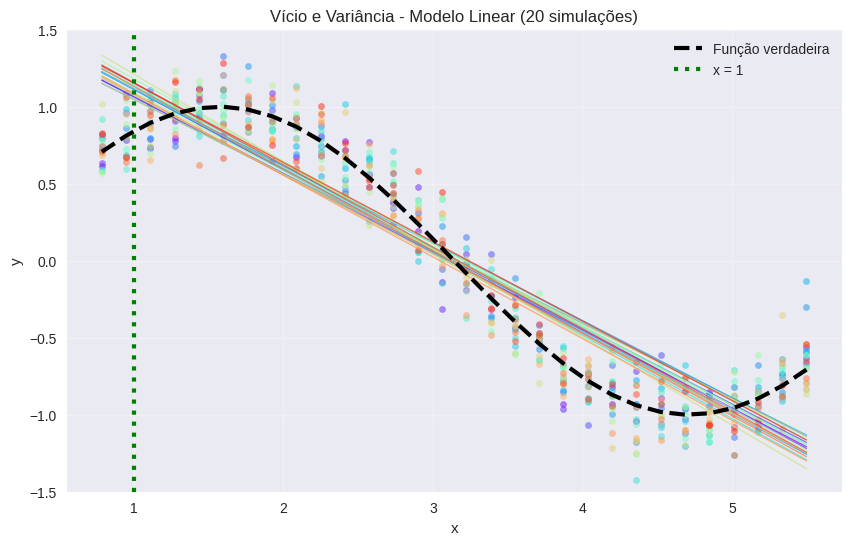

In [4]:
# 3. SEGUNDA DEMONSTRAÇÃO: MÚLTIPLOS CONJUNTOS - MODELO LINEAR
print("\n2. DEMONSTRAÇÃO DO VÍCIO E VARIÂNCIA - MODELO LINEAR")

n_simulacoes = 20
predicoes_lineares = np.zeros((n_simulacoes, len(x)))
predicoes_x1_linear = np.zeros(n_simulacoes)

plt.figure(figsize=(10, 6))

for i in range(n_simulacoes):
    # Gerar novos dados com ruído
    y_sim = np.sin(x) + np.random.normal(0, 0.15, len(x))

    # Ajustar modelo linear
    modelo = LinearRegression()
    modelo.fit(X_reshaped, y_sim)
    y_pred = modelo.predict(X_reshaped)

    # Armazenar previsões
    predicoes_lineares[i] = y_pred
    predicoes_x1_linear[i] = modelo.predict([[1]])[0]  # Previsão em x=1

    # Plot
    plt.scatter(x, y_sim, color=plt.cm.rainbow(i/n_simulacoes), s=20, alpha=0.5)
    plt.plot(x, y_pred, color=plt.cm.rainbow(i/n_simulacoes), alpha=0.7, linewidth=1)

plt.plot(x, fx, 'k--', linewidth=3, label='Função verdadeira')
plt.axvline(x=1, color='green', linestyle=':', linewidth=3, label='x = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Vício e Variância - Modelo Linear ({n_simulacoes} simulações)')
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


3. DEMONSTRAÇÃO DO VÍCIO E VARIÂNCIA - REDE NEURAL


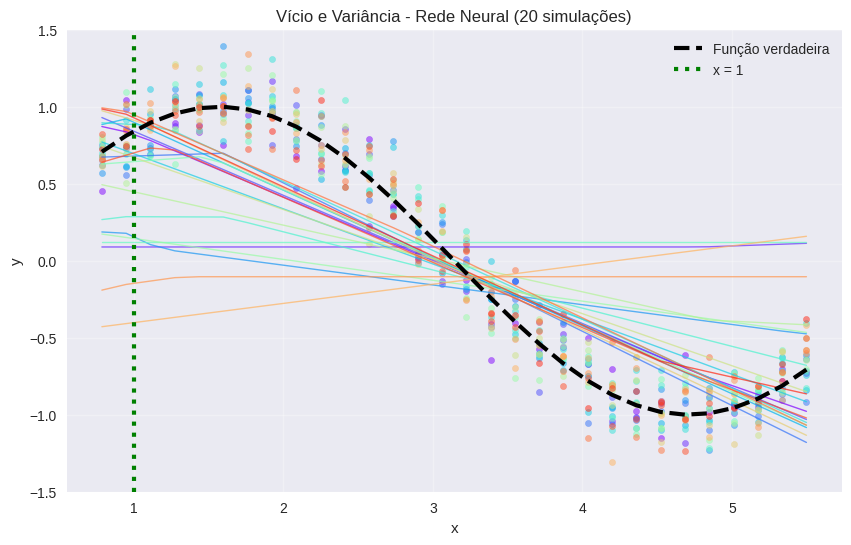

In [5]:
# 4. TERCEIRA DEMONSTRAÇÃO: MÚLTIPLOS CONJUNTOS - REDE NEURAL
print("\n3. DEMONSTRAÇÃO DO VÍCIO E VARIÂNCIA - REDE NEURAL")

predicoes_rna = np.zeros((n_simulacoes, len(x)))
predicoes_x1_rna = np.zeros(n_simulacoes)

plt.figure(figsize=(10, 6))

for i in range(n_simulacoes):
    # Gerar novos dados com ruído
    y_sim = np.sin(x) + np.random.normal(0, 0.15, len(x))

    # Ajustar rede neural (arquitetura menor para estabilidade)
    modelo = MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000, random_state=i)
    modelo.fit(X_reshaped, y_sim)
    y_pred = modelo.predict(X_reshaped)

    # Armazenar previsões
    predicoes_rna[i] = y_pred
    predicoes_x1_rna[i] = modelo.predict([[1]])[0]  # Previsão em x=1

    # Plot
    plt.scatter(x, y_sim, color=plt.cm.rainbow(i/n_simulacoes), s=20, alpha=0.5)
    plt.plot(x, y_pred, color=plt.cm.rainbow(i/n_simulacoes), alpha=0.7, linewidth=1)

plt.plot(x, fx, 'k--', linewidth=3, label='Função verdadeira')
plt.axvline(x=1, color='green', linestyle=':', linewidth=3, label='x = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Vício e Variância - Rede Neural ({n_simulacoes} simulações)')
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

In [6]:
# 5. ANÁLISE QUANTITATIVA DO VÍCIO E VARIÂNCIA
print("\n4. ANÁLISE QUANTITATIVA DO VÍCIO E VARIÂNCIA")

# Calcular métricas para cada ponto x
vicio_linear = np.mean(predicoes_lineares, axis=0) - fx
variancia_linear = np.var(predicoes_lineares, axis=0)

vicio_rna = np.mean(predicoes_rna, axis=0) - fx
variancia_rna = np.var(predicoes_rna, axis=0)

# MSE esperado = Vício² + Variância
mse_esperado_linear = vicio_linear**2 + variancia_linear
mse_esperado_rna = vicio_rna**2 + variancia_rna

# Análise no ponto x = 1
idx_x1 = np.argmin(np.abs(x - 1))  # Índice mais próximo de x=1
fx_x1 = fx[idx_x1]

print(f"\nANÁLISE NO PONTO x = 1:")
print(f"Valor verdadeiro f(1) = {fx_x1:.4f}")

print(f"\nMODELO LINEAR:")
print(f"  Média das previsões: {np.mean(predicoes_x1_linear):.4f}")
print(f"  Vício: {np.mean(predicoes_x1_linear) - fx_x1:.4f}")
print(f"  Variância: {np.var(predicoes_x1_linear):.4f}")
print(f"  MSE esperado: {(np.mean(predicoes_x1_linear) - fx_x1)**2 + np.var(predicoes_x1_linear):.4f}")

print(f"\nREDE NEURAL:")
print(f"  Média das previsões: {np.mean(predicoes_x1_rna):.4f}")
print(f"  Vício: {np.mean(predicoes_x1_rna) - fx_x1:.4f}")
print(f"  Variância: {np.var(predicoes_x1_rna):.4f}")
print(f"  MSE esperado: {(np.mean(predicoes_x1_rna) - fx_x1)**2 + np.var(predicoes_x1_rna):.4f}")


4. ANÁLISE QUANTITATIVA DO VÍCIO E VARIÂNCIA

ANÁLISE NO PONTO x = 1:
Valor verdadeiro f(1) = 0.8122

MODELO LINEAR:
  Média das previsões: 1.1134
  Vício: 0.3012
  Variância: 0.0019
  MSE esperado: 0.0926

REDE NEURAL:
  Média das previsões: 0.5159
  Vício: -0.2962
  Variância: 0.1536
  MSE esperado: 0.2414


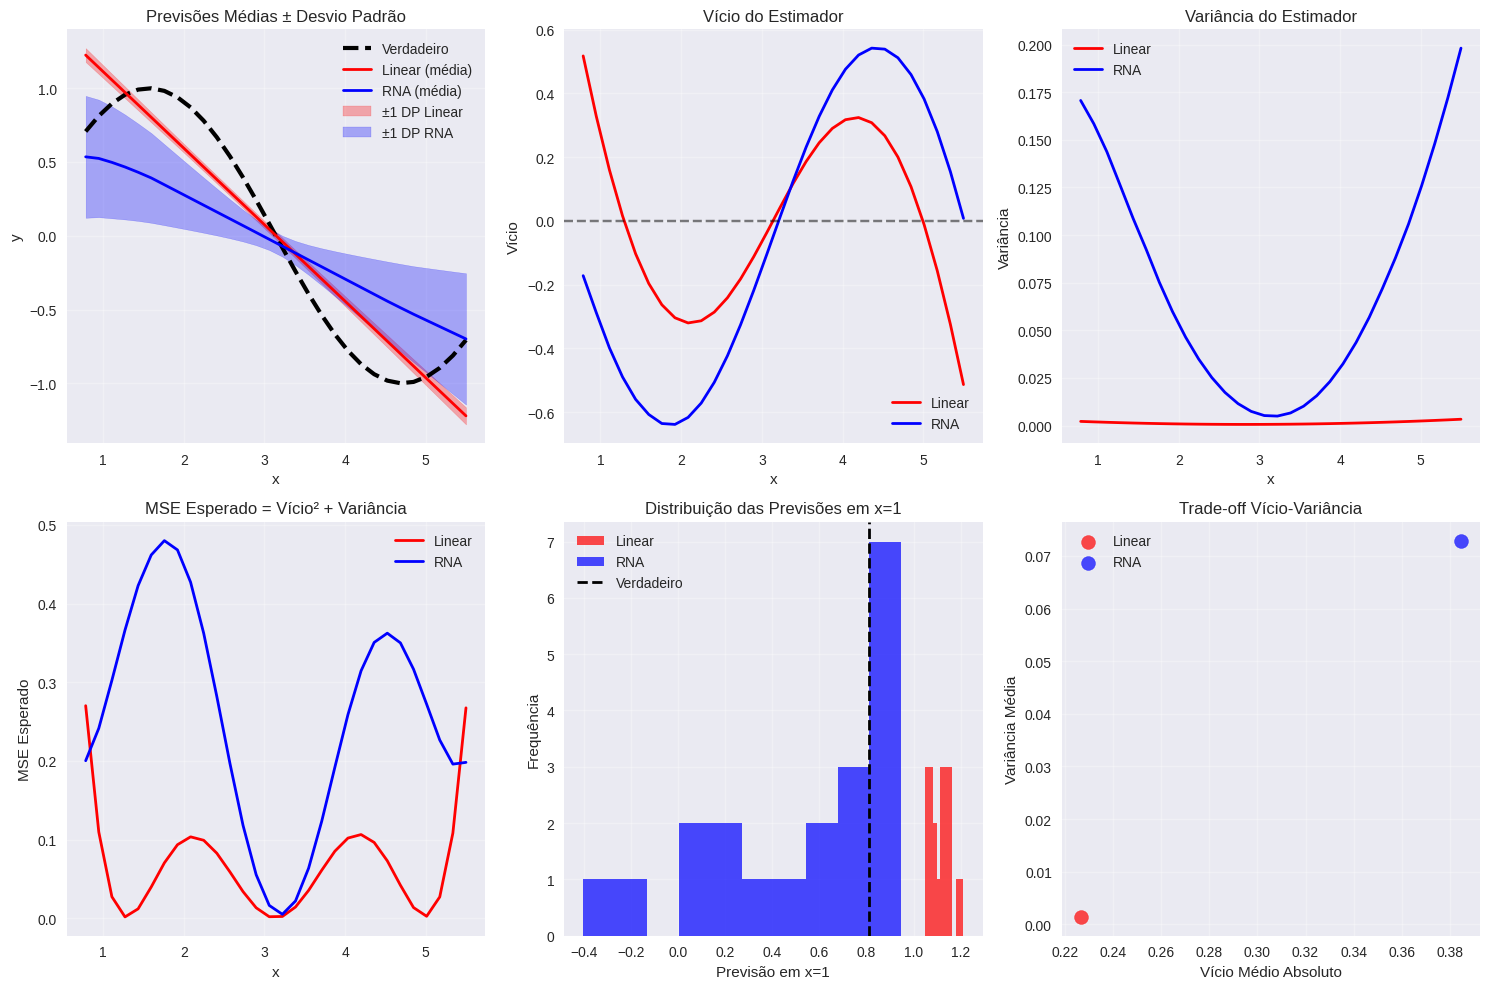

In [7]:
# 6. VISUALIZAÇÃO COMPARATIVA DO VÍCIO E VARIÂNCIA
plt.figure(figsize=(15, 10))

# Gráfico 1: Comparação das previsões médias
plt.subplot(2, 3, 1)
plt.plot(x, fx, 'k--', linewidth=3, label='Verdadeiro')
plt.plot(x, np.mean(predicoes_lineares, axis=0), 'red', linewidth=2, label='Linear (média)')
plt.plot(x, np.mean(predicoes_rna, axis=0), 'blue', linewidth=2, label='RNA (média)')
plt.fill_between(x,
                np.mean(predicoes_lineares, axis=0) - np.std(predicoes_lineares, axis=0),
                np.mean(predicoes_lineares, axis=0) + np.std(predicoes_lineares, axis=0),
                alpha=0.3, color='red', label='±1 DP Linear')
plt.fill_between(x,
                np.mean(predicoes_rna, axis=0) - np.std(predicoes_rna, axis=0),
                np.mean(predicoes_rna, axis=0) + np.std(predicoes_rna, axis=0),
                alpha=0.3, color='blue', label='±1 DP RNA')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Previsões Médias ± Desvio Padrão')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Vício por ponto x
plt.subplot(2, 3, 2)
plt.plot(x, vicio_linear, 'red', linewidth=2, label='Linear')
plt.plot(x, vicio_rna, 'blue', linewidth=2, label='RNA')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Vício')
plt.title('Vício do Estimador')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 3: Variância por ponto x
plt.subplot(2, 3, 3)
plt.plot(x, variancia_linear, 'red', linewidth=2, label='Linear')
plt.plot(x, variancia_rna, 'blue', linewidth=2, label='RNA')
plt.xlabel('x')
plt.ylabel('Variância')
plt.title('Variância do Estimador')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 4: MSE Esperado
plt.subplot(2, 3, 4)
plt.plot(x, mse_esperado_linear, 'red', linewidth=2, label='Linear')
plt.plot(x, mse_esperado_rna, 'blue', linewidth=2, label='RNA')
plt.xlabel('x')
plt.ylabel('MSE Esperado')
plt.title('MSE Esperado = Vício² + Variância')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 5: Distribuição das previsões em x=1
plt.subplot(2, 3, 5)
plt.hist(predicoes_x1_linear, bins=10, alpha=0.7, color='red', label='Linear')
plt.hist(predicoes_x1_rna, bins=10, alpha=0.7, color='blue', label='RNA')
plt.axvline(x=fx_x1, color='black', linestyle='--', linewidth=2, label='Verdadeiro')
plt.xlabel('Previsão em x=1')
plt.ylabel('Frequência')
plt.title('Distribuição das Previsões em x=1')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 6: Trade-off Vício-Variância
plt.subplot(2, 3, 6)
plt.scatter(np.abs(vicio_linear).mean(), variancia_linear.mean(),
           s=100, color='red', label='Linear', alpha=0.7)
plt.scatter(np.abs(vicio_rna).mean(), variancia_rna.mean(),
           s=100, color='blue', label='RNA', alpha=0.7)
plt.xlabel('Vício Médio Absoluto')
plt.ylabel('Variância Média')
plt.title('Trade-off Vício-Variância')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# 7. RESUMO ESTATÍSTICO
print("\n5. RESUMO ESTATÍSTICO COMPARATIVO")

resumo = pd.DataFrame({
    'Métrica': ['Vício Médio Absoluto', 'Variância Média', 'MSE Esperado Médio'],
    'Modelo Linear': [
        np.abs(vicio_linear).mean(),
        variancia_linear.mean(),
        mse_esperado_linear.mean()
    ],
    'Rede Neural': [
        np.abs(vicio_rna).mean(),
        variancia_rna.mean(),
        mse_esperado_rna.mean()
    ]
})

print(resumo.round(4))

print(f"\nCONCLUSÕES:")
print(f"• Modelo Linear: Tendência a ter menor variância mas maior vício")
print(f"• Rede Neural: Tendência a ter menor vício mas maior variância")
print(f"• O MSE esperado mostra o trade-off entre vício e variância")

print("\n=== ANÁLISE DE VÍCIO E VARIÂNCIA CONCLUÍDA ===")


5. RESUMO ESTATÍSTICO COMPARATIVO
                Métrica  Modelo Linear  Rede Neural
0  Vício Médio Absoluto         0.2265       0.3846
1       Variância Média         0.0014       0.0729
2    MSE Esperado Médio         0.0685       0.2551

CONCLUSÕES:
• Modelo Linear: Tendência a ter menor variância mas maior vício
• Rede Neural: Tendência a ter menor vício mas maior variância
• O MSE esperado mostra o trade-off entre vício e variância

=== ANÁLISE DE VÍCIO E VARIÂNCIA CONCLUÍDA ===
